**Install Packages**

In [1]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@eb04d1b21e08cfd0713164c0907aeb4c98fd83af timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

Cloning into 'ImageBind'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 146 (delta 60), reused 39 (delta 39), pack-reused 58 (from 1)
Receiving objects: 100% (146/146), 2.64 MiB | 6.06 MiB/s, done.
Resolving deltas: 100% (68/68), done.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision eb04d1b21e08cfd0713164c0907aeb4c98fd83af) to /tmp/pip-req-build-_m358l1p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-_m358l1p
  Running command git rev-parse -q --verify 'sha^eb04d1b21e08cfd0713164c0907aeb4c98fd83af'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Running command git checkout -q eb04d1b21e08cfd0713164c0907aeb4c98fd83af
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit eb04d1b21

**Import Packages**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Download Dataset**

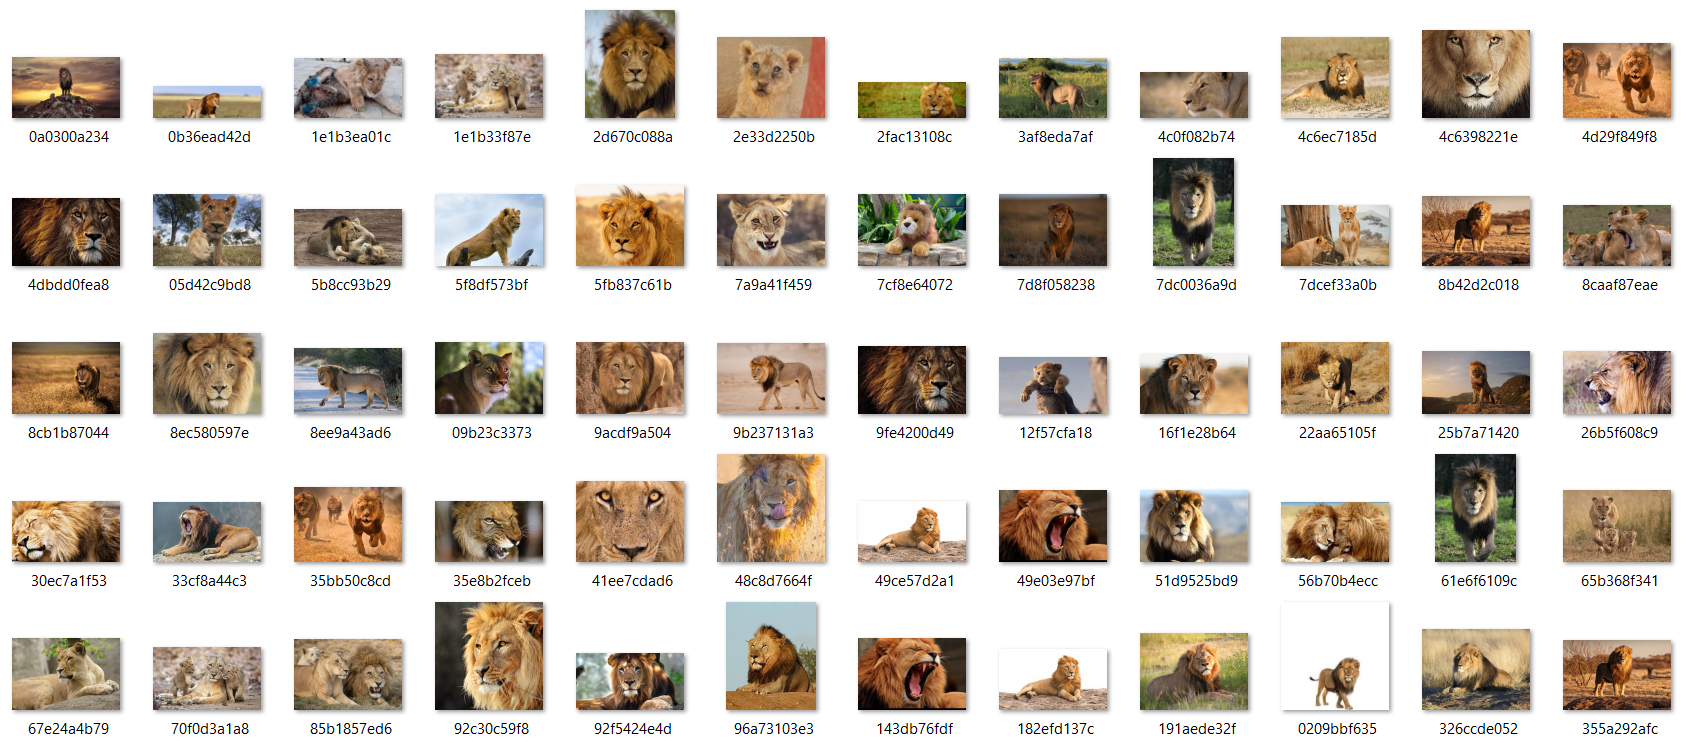

In [3]:
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/iamsouravbanerjee/animal-image-dataset-90-different-animals

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  656M  100  656M    0     0   124M      0  0:00:05  0:00:05 --:--:--  146M


In [4]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

In [5]:
!ls animals/animals/

antelope     cockroach	elephant     hippopotamus  lobster    parrot	      seahorse	turtle
badger	     cow	flamingo     hornbill	   mosquito   pelecaniformes  seal	whale
bat	     coyote	fly	     horse	   moth       penguin	      shark	wolf
bear	     crab	fox	     hummingbird   mouse      pig	      sheep	wombat
bee	     crow	goat	     hyena	   octopus    pigeon	      snake	woodpecker
beetle	     deer	goldfish     jellyfish	   okapi      porcupine       sparrow	zebra
bison	     dog	goose	     kangaroo	   orangutan  possum	      squid
boar	     dolphin	gorilla      koala	   otter      raccoon	      squirrel
butterfly    donkey	grasshopper  ladybugs	   owl	      rat	      starfish
cat	     dragonfly	hamster      leopard	   ox	      reindeer	      swan
caterpillar  duck	hare	     lion	   oyster     rhinoceros      tiger
chimpanzee   eagle	hedgehog     lizard	   panda      sandpiper       turkey


In [6]:
%cd /content/ImageBind

/content/ImageBind


In [7]:
import imagebind.data
import torch
import os
from functools import reduce
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

def list_images_in_dir(directory_path):
    return [directory_path + "/" + f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

text_list = ["gorilla", "lion", "wolf", "zebra"]
animals = reduce(lambda x, y: {**x, **y}, [{ animal: { "images": list_images_in_dir("/content/animals/animals/"+animal)}} for animal in text_list])

animals

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


{'gorilla': {'images': ['/content/animals/animals/gorilla/3f182f7912.jpg',
   '/content/animals/animals/gorilla/42e8d22e36.jpg',
   '/content/animals/animals/gorilla/76a01475c9.jpg',
   '/content/animals/animals/gorilla/96b84b024b.jpg',
   '/content/animals/animals/gorilla/9f6437e647.jpg',
   '/content/animals/animals/gorilla/6c698898f6.jpg',
   '/content/animals/animals/gorilla/80f35aa42a.jpg',
   '/content/animals/animals/gorilla/7f630b530a.jpg',
   '/content/animals/animals/gorilla/8b41523b24.jpg',
   '/content/animals/animals/gorilla/290fd87d45.jpg',
   '/content/animals/animals/gorilla/56f9d5a04e.jpg',
   '/content/animals/animals/gorilla/1ad709457f.jpg',
   '/content/animals/animals/gorilla/64e6198478.jpg',
   '/content/animals/animals/gorilla/92bd5a31ed.jpg',
   '/content/animals/animals/gorilla/7bac92b151.jpg',
   '/content/animals/animals/gorilla/010d3131e7.jpg',
   '/content/animals/animals/gorilla/7c8e5ebd9a.jpg',
   '/content/animals/animals/gorilla/9a36f44210.jpg',
   '/co

In [8]:
image_paths = []

for animal in animals.keys():
    print(animal + " has " + str(len(animals[animal]["images"])) + " images.")
    image_paths.extend(animals[animal]["images"])

gorilla has 60 images.
lion has 60 images.
wolf has 60 images.
zebra has 60 images.


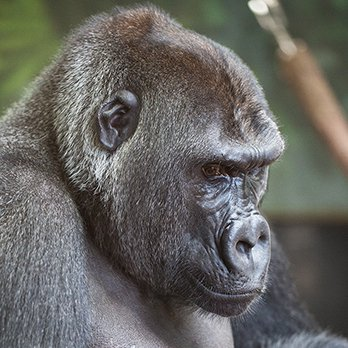

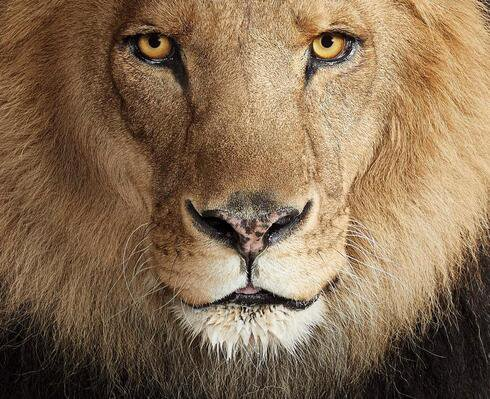

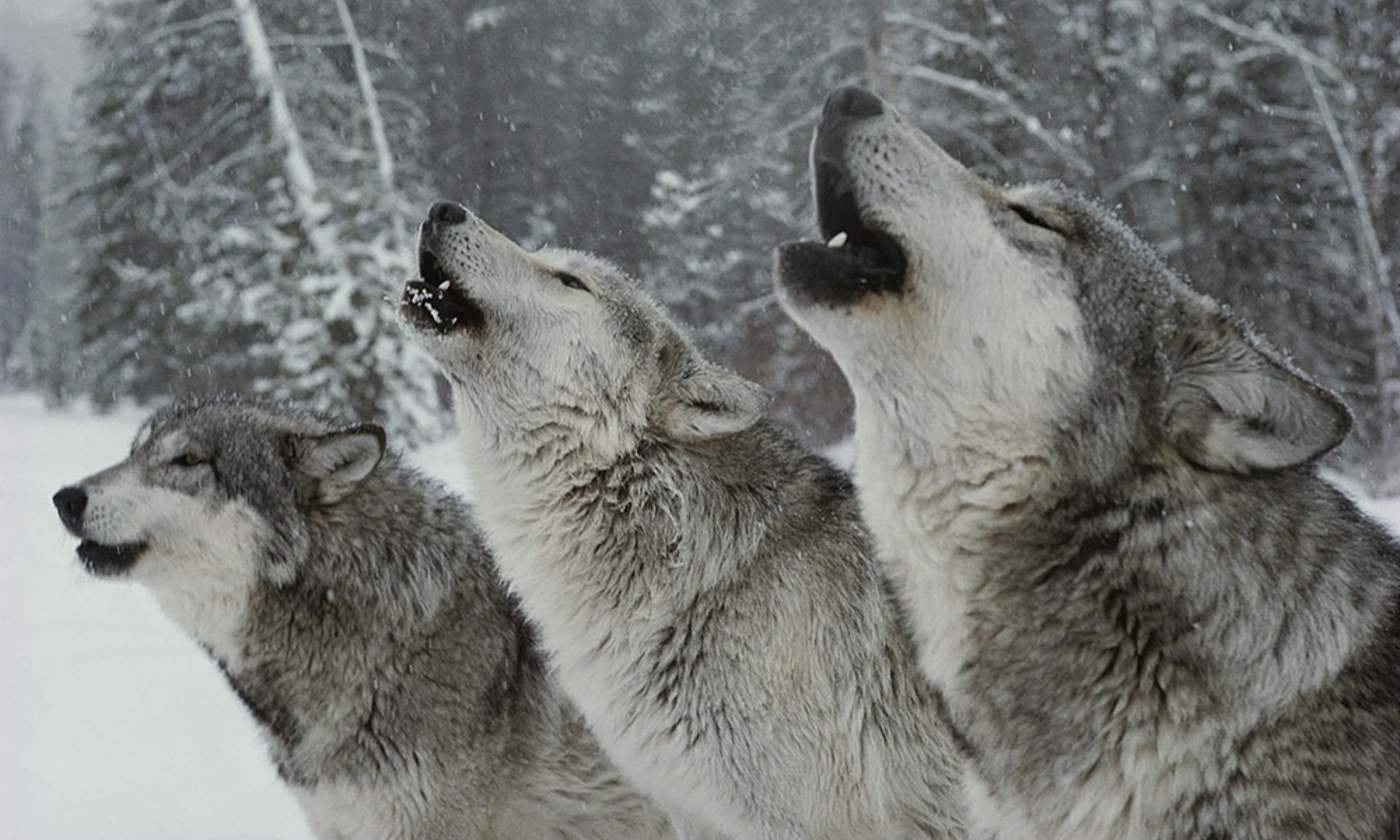

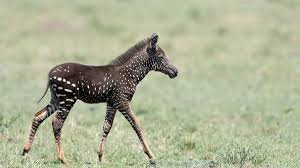

In [9]:
import IPython
from PIL import Image

display(Image.open(image_paths[0]))
display(Image.open(image_paths[60]))
display(Image.open(image_paths[120]))
display(Image.open(image_paths[180]))

**Train Imagebind LLM Model**

In [10]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

inputs = {
    ModalityType.TEXT: imagebind.data.load_and_transform_text(text_list, device),
    ModalityType.VISION: imagebind.data.load_and_transform_vision_data(image_paths, device),
}

100%|██████████| 4.47G/4.47G [00:27<00:00, 175MB/s]
/content/ImageBind/imagebind/models/imagebind_model.py:504: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_stat

In [11]:
with torch.no_grad():
    embeddings = model(inputs)

In [12]:
print(
 "Vision x Text: ",
 torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),
)

Vision x Text:  tensor([[9.9970e-01, 2.9740e-04, 1.9375e-08, 1.1980e-07],
        [9.9998e-01, 1.8768e-05, 7.9952e-10, 3.8866e-09],
        [9.9955e-01, 4.5158e-04, 4.5093e-07, 2.6071e-06],
        [9.9999e-01, 1.3465e-05, 7.5628e-10, 6.9993e-09],
        [9.9996e-01, 3.6110e-05, 1.4992e-07, 1.0762e-06],
        [9.9758e-01, 2.3896e-03, 1.3558e-07, 2.8043e-05],
        [9.9998e-01, 2.3664e-05, 5.4427e-09, 2.3255e-08],
        [9.9989e-01, 1.0708e-04, 7.1488e-08, 1.3438e-06],
        [9.9990e-01, 9.6538e-05, 1.4658e-07, 1.1646e-07],
        [9.9966e-01, 3.2898e-04, 3.7311e-08, 1.3218e-05],
        [9.9991e-01, 8.4827e-05, 2.3239e-07, 2.5386e-06],
        [9.9998e-01, 2.0003e-05, 2.9493e-08, 2.0710e-07],
        [9.9997e-01, 2.5981e-05, 2.2279e-08, 8.3222e-08],
        [9.9997e-01, 2.9173e-05, 7.7104e-08, 3.4284e-07],
        [9.9988e-01, 1.1714e-04, 3.9683e-09, 3.1176e-08],
        [9.9995e-01, 5.3803e-05, 2.0349e-07, 2.5251e-08],
        [9.9999e-01, 6.4951e-06, 1.9068e-09, 6.1353e-09]

**Clustering Quality Metrics**

In [13]:
import pandas as pd
df = pd.DataFrame(columns=text_list)

for tensor in torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1):
    new_row = {}
    for tensor_idx, tensor_part in enumerate(tensor):
        new_row[text_list[tensor_idx]] = 1 if tensor_part > 0.9 else 0
    df.loc[len(df)] = new_row

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

     gorilla  lion  wolf  zebra
0          1     0     0      0
1          1     0     0      0
2          1     0     0      0
3          1     0     0      0
4          1     0     0      0
5          1     0     0      0
6          1     0     0      0
7          1     0     0      0
8          1     0     0      0
9          1     0     0      0
10         1     0     0      0
11         1     0     0      0
12         1     0     0      0
13         1     0     0      0
14         1     0     0      0
15         1     0     0      0
16         1     0     0      0
17         1     0     0      0
18         1     0     0      0
19         1     0     0      0
20         1     0     0      0
21         1     0     0      0
22         1     0     0      0
23         1     0     0      0
24         1     0     0      0
25         1     0     0      0
26         1     0     0      0
27         1     0     0      0
28         1     0     0      0
29         1     0     0      0
30      

In [14]:
import numpy as np

labels = []

# Convert to list of cluster ids
for idx, row in df.iterrows():
  if row.gorilla:
    labels.append(0)
    continue
  elif row.lion:
    labels.append(1)
    continue
  elif row.wolf:
    labels.append(2)
    continue
  elif row.zebra:
    labels.append(3)
    continue

labels = np.array(labels)

In [15]:
y_true = []

cluster_id = 0
for animal in text_list:
    y_true.extend([cluster_id] *len(animals[animal]["images"]))
    cluster_id += 1

y_true = np.array(y_true)

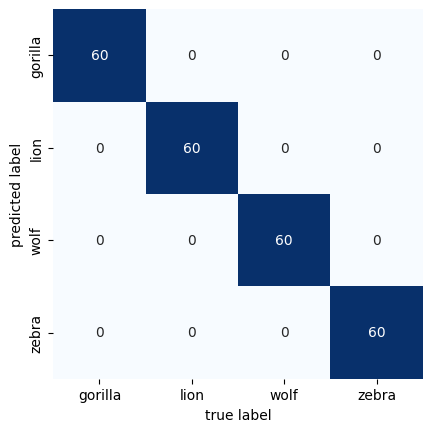

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=text_list, yticklabels=text_list)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

1.0